# Tutorial for FinML repository

This notebook provides a series of simple examples to utilze our package 

Our package is based on <b>python 3.6</b>

## Prerequisite

In [ ]:
# Clone the repository
!git clone https://github.com/yanghoonkim/FinML.git

# Get into the base directory
%cd FinML

# Install prerequisite packages
!pip3 install -r requirements.txt

## Korean Stock Market

In [7]:
# Import basic packages
import os
from datetime import datetime

# Import a module for data retrieval
from finml.data_reader import GetInitData

###  Get initial data
<p>- For the first time, the whole data retrieval process will take about an hour</p>
<p>- This process will download the market and fundamental data to data/</p>
<p>- These data can be used for portfolio optimization</p>

In [3]:
kor_market = GetInitData(source='krx', data_path = 'data')
kor_market.get_tickers() # Get a list of stock tickers
kor_market.get_prices_and_volumes(start=datetime(2010,1,1), # Get price information (for all stocks)
                      end=datetime.now()) 
kor_market.get_fs() # Get financial statements (for all stocks)
kor_market.fs_cleansing(standard='005930') # Filter elements of financial statements with the given standard
kor_market.calculate_indicators() # Calculate investment indicators

Load tickers: data/krx/tickers.pkl
Load prices & volumes: data/krx/prices.pkl & data/krx/volumes.pkl
Financial statements exists: data/krx/fs
Load financial statements: data/krx/fss.pkl
Load indicators: data/krx/indicators.pkl


### Portfolio selection
<p>- We provide several factors for portfolio selection (Still to be updated) </p>
<p>- Here we provide <a href="https://en.wikipedia.org/wiki/Low-volatility_investing">low-volatility portfolio</a> as a single factor for portfolio selection </p>

In [5]:
from finml.portfolio_selection.single_factor import lowVol

stock_list = lowVol(
        market=kor_market,
        last_nyears=1,
        num_pf=30,
        interval='d')

### Portfolio optimization
<p>- Here we show <a href="https://www.investopedia.com/terms/m/meanvariance-analysis.asp">mean-variance analysis</a> for the selected portfolio </p>

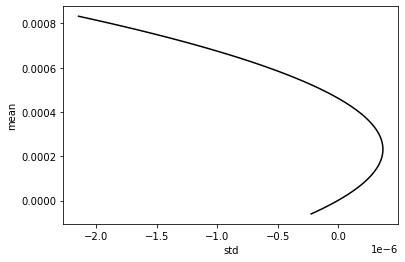

In [12]:
from finml.portfolio_optimization import SimpleMeanVariance

start, end = kor_market.convert_to_date(last_nyears=1)

# Calculate mean and covariance for returns
mean, cov = kor_market.get_mean_cov(
        interval='d',
        start=start,
        end=end,
        subset=stock_list)

# Define an instance for mean-variance analysis
SMV = SimpleMeanVariance(mean, cov)

if not os.path.exists('data/plot'):
    %mkdir data/plot

SMV.plot(show=True, save_path='data/plot/simple_mean_variance.jpeg')

### <a href="https://www.investopedia.com/terms/c/capm.asp#:~:text=The%20Capital%20Asset%20Pricing%20Model%20(CAPM)%20describes%20the%20relationship%20between,assets%20and%20cost%20of%20capital.">CAPM (Captial Asset Pricing Model)</a>

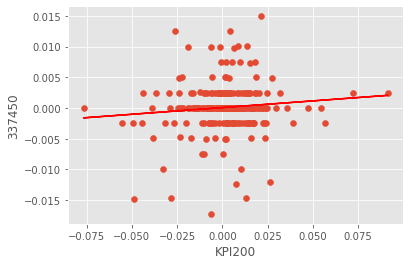

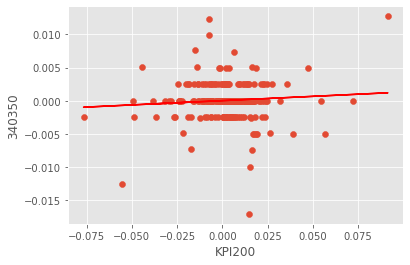

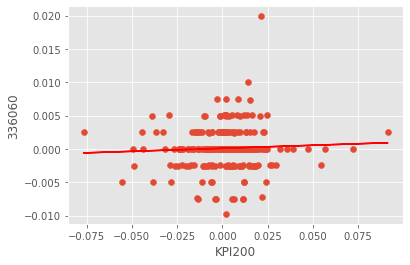

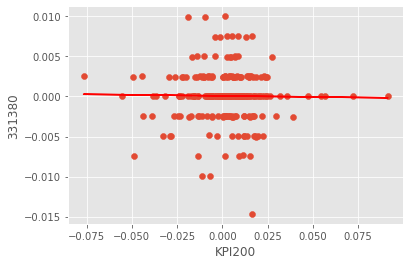

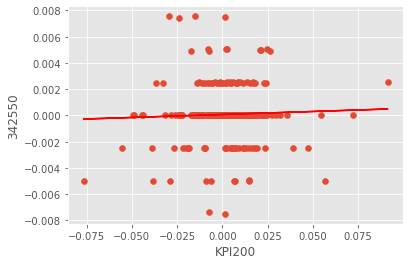

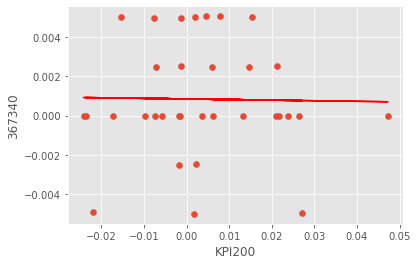

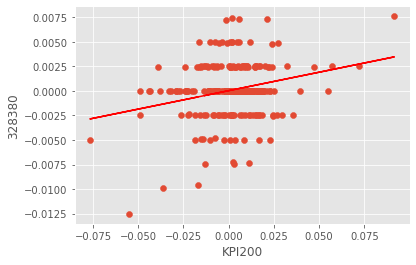

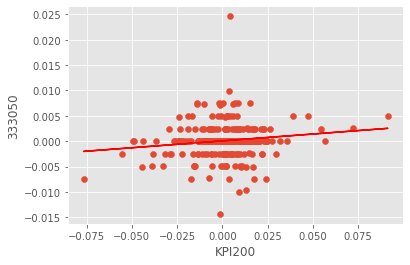

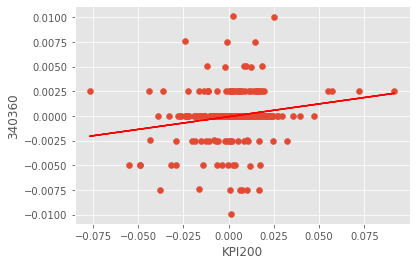

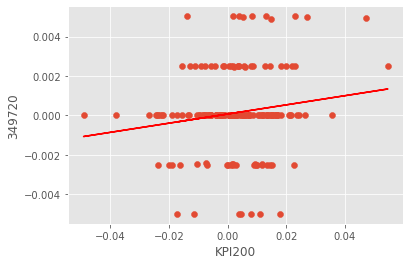

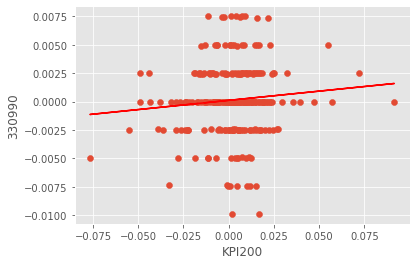

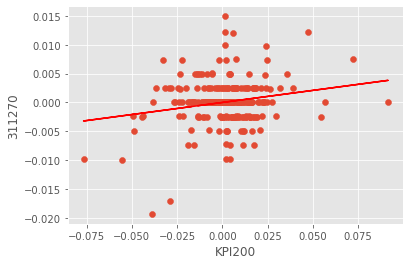

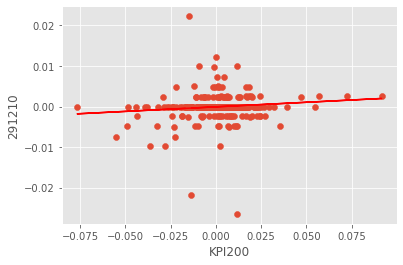

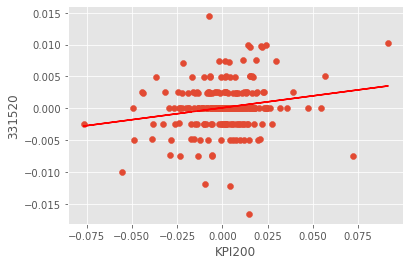

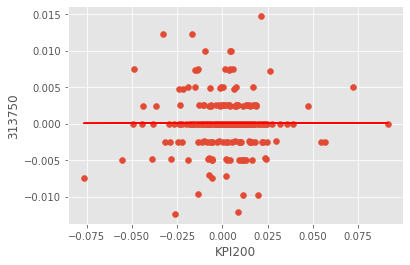

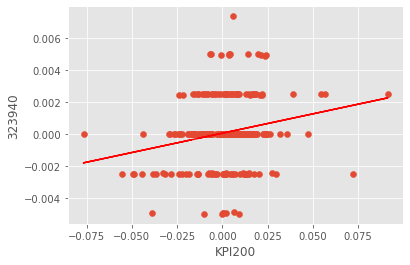

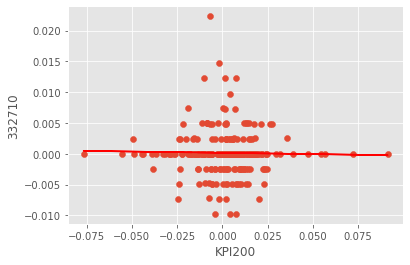

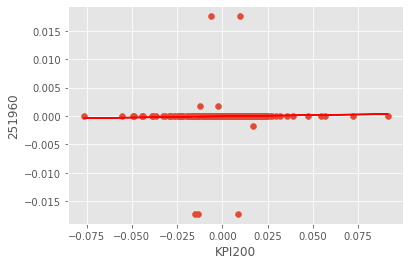

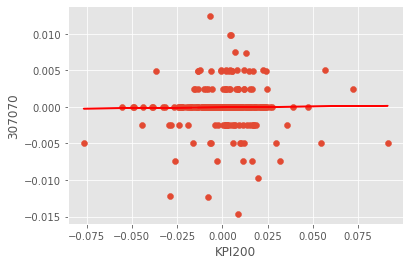

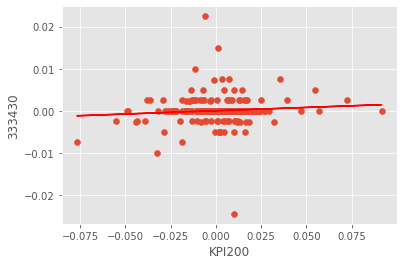

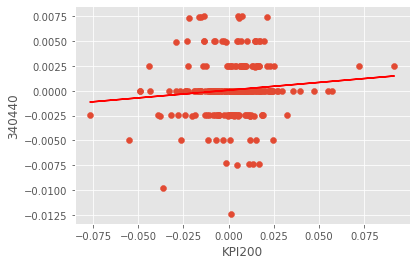

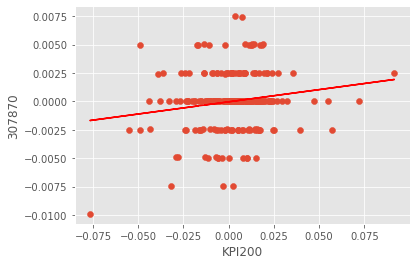

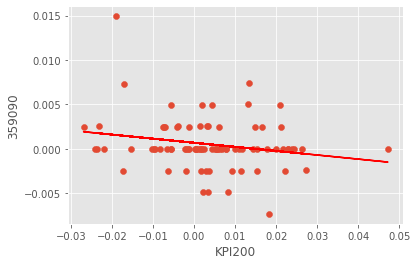

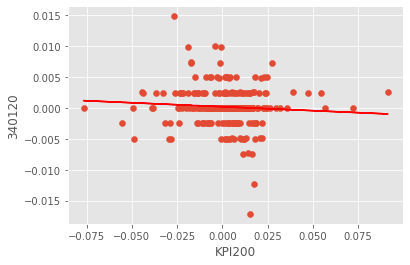

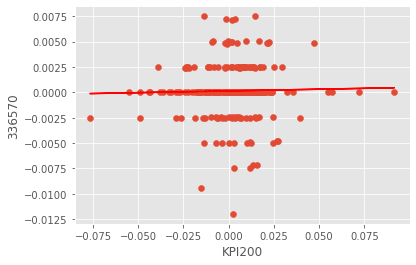

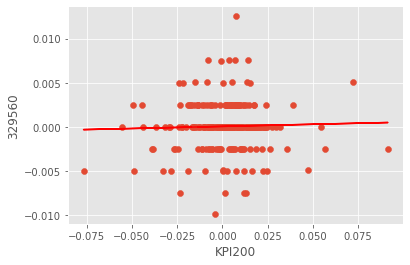

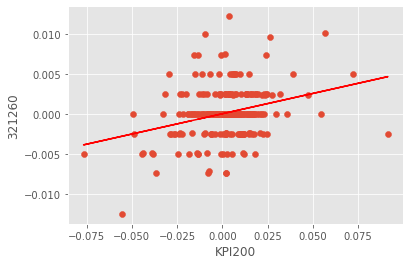

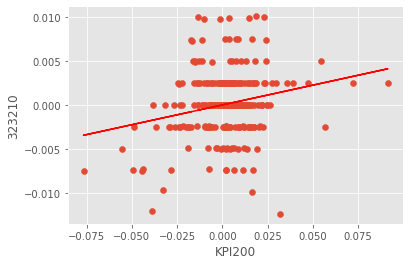

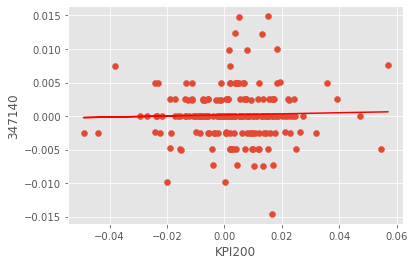

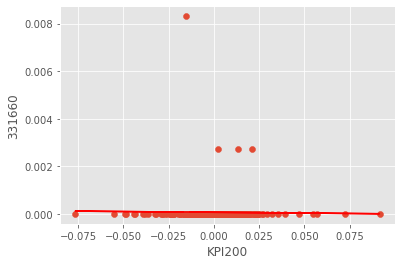

In [13]:
from finml.asset_pricing import CAPM

returns, betas, alphas = CAPM(
        market = kor_market, 
        stock_tickers = stock_list, 
        index_ticker = 'KPI200', 
        risk_free = 0, 
        start = start,
        end = end)

### <a href="https://www.investopedia.com/terms/f/famaandfrenchthreefactormodel.asp">Fama-French Three Factor Model</a>

Download factor data (data may not be accurate)...
                            OLS Regression Results                            
Dep. Variable:                T005930   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     645.6
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          1.35e-303
Time:                        22:00:57   Log-Likelihood:                 6731.0
No. Observations:                2279   AIC:                        -1.345e+04
Df Residuals:                    2275   BIC:                        -1.343e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

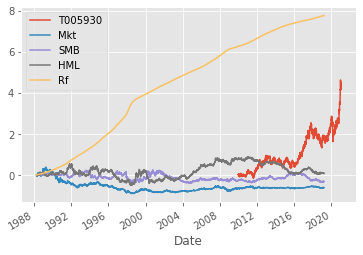

In [14]:
from finml.asset_pricing import FamaFrench3

FamaFrench3(
        market=kor_market,
        ticker='005930',
        tools='statsmodels',
        plot_return=True)